##Fashion_mnist_data

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import tensorflow as tf 
import matplotlib.pyplot as plt 

In [2]:
#data_load 
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_x,train_y),(test_x,test_y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


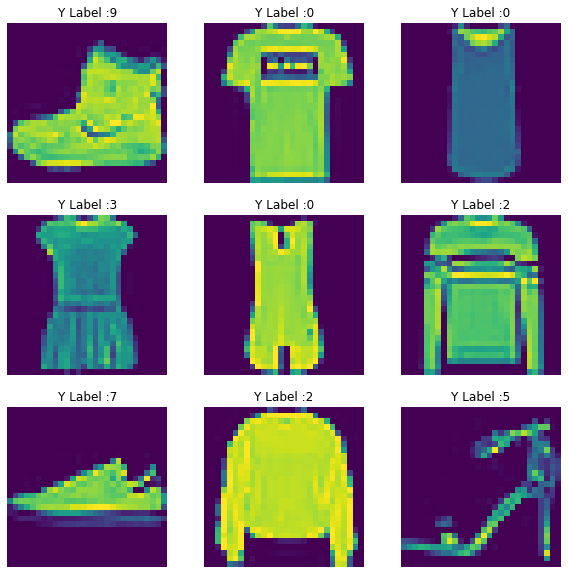

In [3]:
plt.figure(figsize = (10,10))

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.title('Y Label :{}'.format(train_y[i]))
  plt.axis('off')
  plt.imshow(train_x[i]) #image file 을 보여주는 

plt.show()

In [4]:
#정규화 어차피 rgb 값은 최소 0 최대 255 이기때문에 

train_x_norm = train_x/ 255.0
test_x_norm = test_x/255.0

In [6]:
#model making
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28,28)), #차원을 1차원으로 변경
                             tf.keras.layers.Dense(units = 128,activation = 'relu'),
                             tf.keras.layers.Dense(units = 64,activation= 'relu'),
                             tf.keras.layers.Dense(units = 32 , activation = 'relu'),
                             tf.keras.layers.Dense(units = 10,activation = 'softmax') #label 10 개 예측 데이터 생성
])

In [7]:
#compile
model.compile(optimizer = tf.keras.optimizers.Adam(),loss = 'SparseCategoricalCrossentropy',metrics = ['accuracy'])

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(train_x_norm , train_y , epochs = 200 , batch_size = 32 , validation_split= 0.2 ,callbacks = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience= 10))

Epoch 1/200
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5298 - accuracy: 0.8122 - val_loss: 0.4313 - val_accuracy: 0.8466
Epoch 2/200
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3883 - accuracy: 0.8597 - val_loss: 0.3753 - val_accuracy: 0.8625
Epoch 3/200
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3482 - accuracy: 0.8727 - val_loss: 0.3494 - val_accuracy: 0.8739
Epoch 4/200
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3218 - accuracy: 0.8809 - val_loss: 0.3845 - val_accuracy: 0.8579
Epoch 5/200
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3075 - accuracy: 0.8857 - val_loss: 0.3645 - val_accuracy: 0.8737
Epoch 6/200
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2940 - accuracy: 0.8914 - val_loss: 0.3376 - val_accuracy: 0.8789
Epoch 7/200
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2782 - accuracy: 0.8960 - val_loss: 0.3273 - val_ac

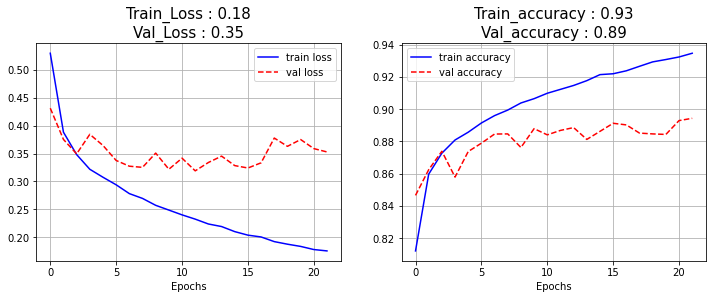

In [10]:
#시각화
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

val_loss = history.history['val_loss']
loss = history.history['loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

plt.plot(history.history['loss'], 'b-', label = 'train loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val loss')
plt.xlabel('Epochs')

plt.title("Train_Loss : {:.2f}\nVal_Loss : {:.2f}".\
          format(loss[-1], val_loss[-1]), fontsize = 15)

plt.legend()
plt.grid()

plt.subplot(1, 2, 2)

plt.plot(history.history['accuracy'], 'b-', label = 'train accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label = 'val accuracy')
plt.xlabel('Epochs')

plt.title("Train_accuracy : {:.2f}\nVal_accuracy : {:.2f}".\
          format(accuracy[-1], val_accuracy[-1]), fontsize = 15)

plt.legend()
plt.grid()

plt.show()

In [18]:
pred_y = model.predict(test_x_norm)
pred_y_round = np.round(pred_y)
pred_y_argmax = np.argmax(pred_y_round,axis =1)

In [12]:
model.evaluate(test_x_norm,test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.3930 - accuracy: 0.8863


[0.3930290937423706, 0.8863000273704529]

In [19]:
print(pred_y_argmax)
print(test_y)

[9 2 1 ... 8 1 5]
[9 2 1 ... 8 1 5]


In [20]:
np.mean(np.equal(pred_y_argmax,test_y))

0.8823

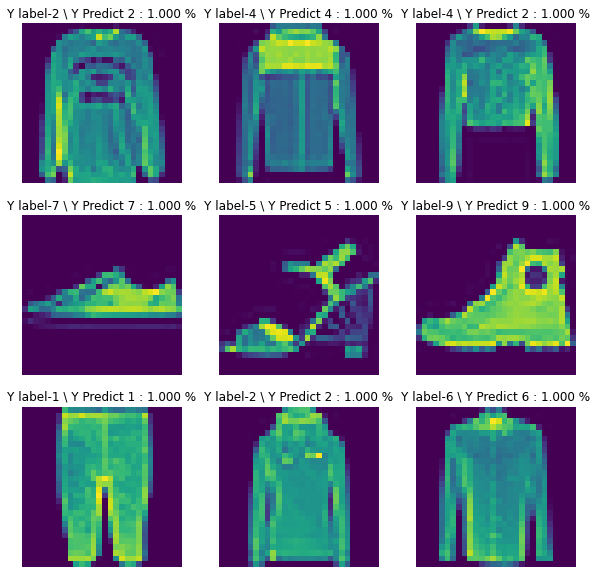

In [21]:
plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3,i+1)

    i = np.random.choice(range(0,10000))
    
    plt.title("Y label-{} \ Y Predict {} : {:.3f} %".\
              format(test_y[i], pred_y_argmax[i],np.max(pred_y_round[:][i])))
    plt.axis('off')
    plt.imshow(test_x[i])

plt.show()